In [19]:
import pandas as pd
from DataCleaning1 import DataCleaner
from DataTransformation1 import DataTransformer
from corr_analysis1 import CorrelationAnalysis
from LSTM_Test import LSTM

In [20]:
file_name = 'Bussiness_facility/combined_data.csv'
df = pd.read_csv(file_name)

df.head()

,Unnamed: 0,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,Patient
0,0,2023-10-25 06:00:00,126.013943,136.435033,0.0,0.013933,0.0,0.446600,0.446600,adolescent
1,1,2023-10-25 06:05:00,126.589661,137.121412,0.0,0.013933,0.0,0.483302,0.483302,adolescent
2,2,2023-10-25 06:10:00,127.155902,138.398018,0.0,0.013933,0.0,0.520644,0.520644,adolescent
3,3,2023-10-25 06:15:00,127.712577,140.060899,0.0,0.013933,0.0,0.558542,0.558542,adolescent
4,4,2023-10-25 06:20:00,128.259611,141.830932,0.0,0.013933,0.0,0.596914,0.596914,adolescent


In [21]:
dependent_variable = 'insulin'

source = 'xls'

problem_type= 'time series'

type_column = ''

I am in problem type identifier function
____ Dataset after missing values Treatment_____


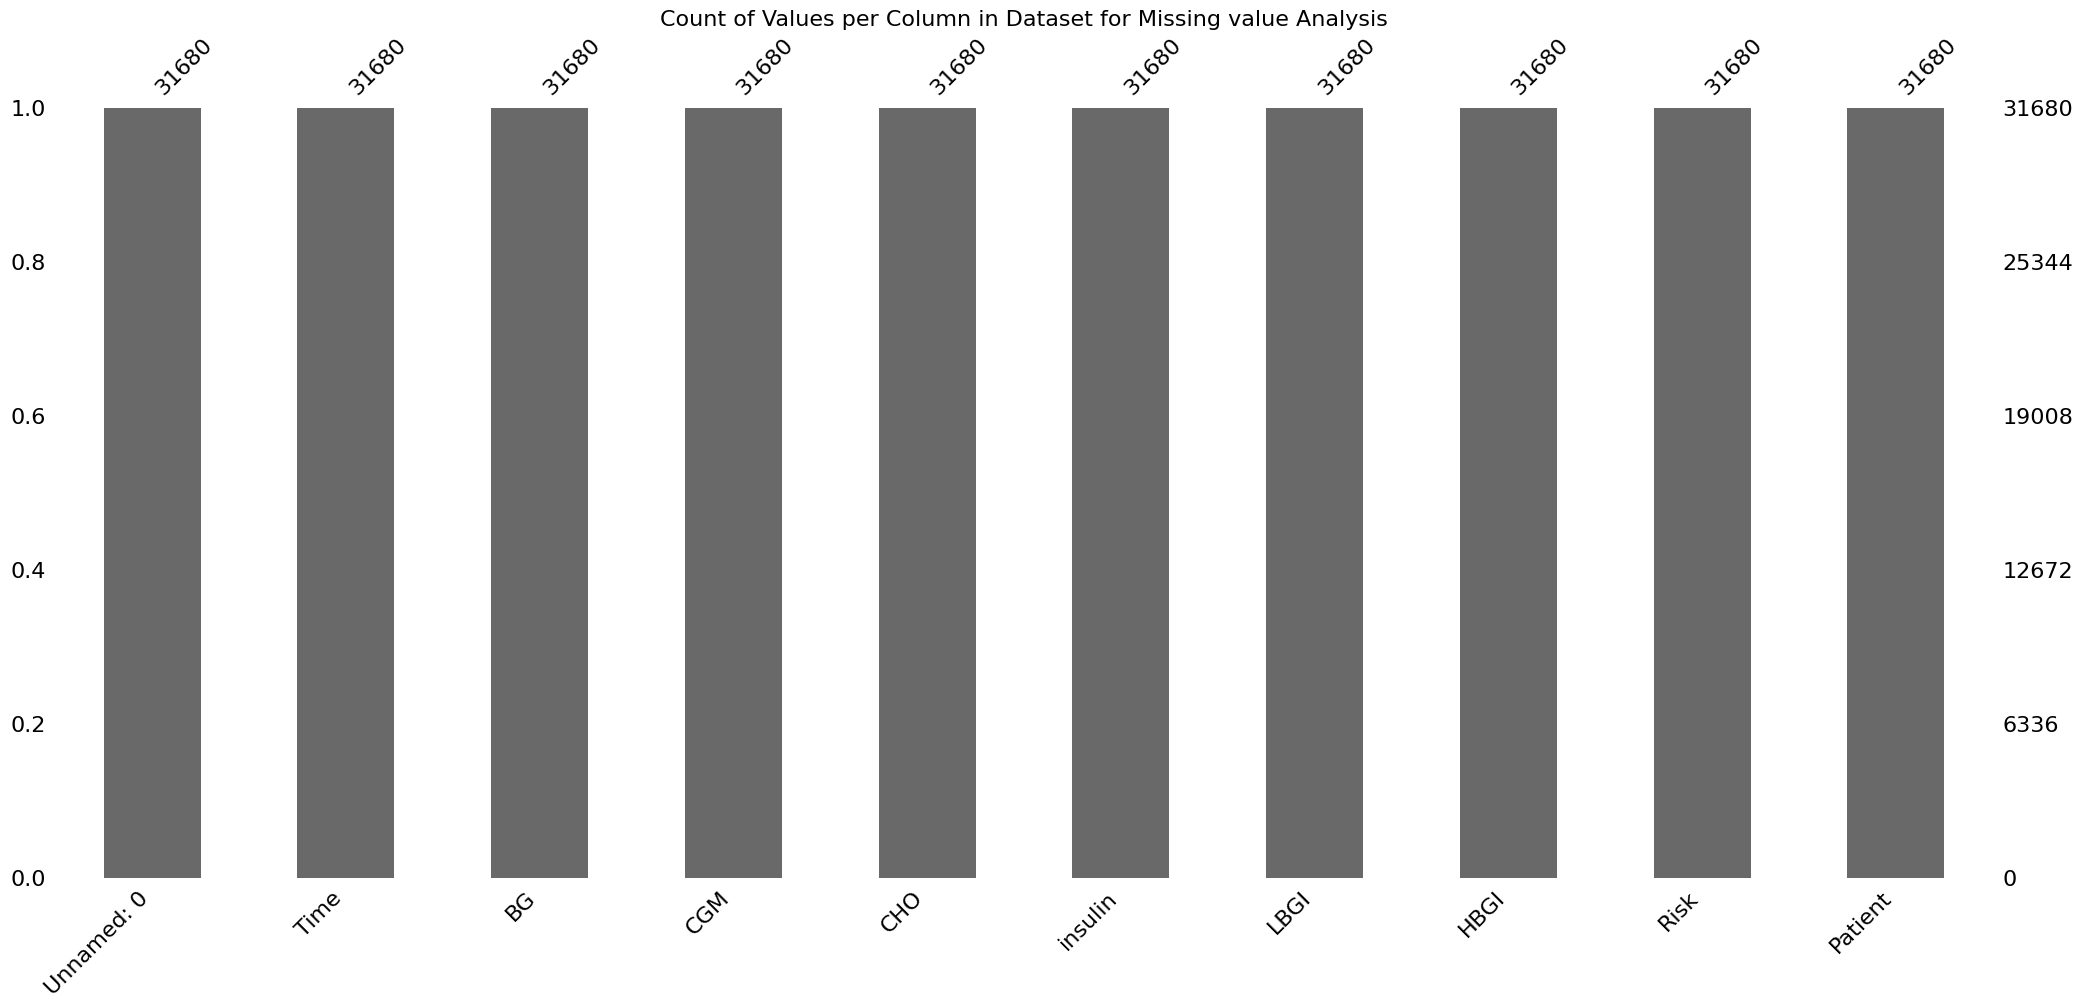

In [22]:
cleaning_instance = DataCleaner(source, df, file_name, problem_type, type_column, dependent_variable)
df1 = cleaning_instance.get_data()

An error occurred in correlation heatmap: [Errno 2] No such file or directory: 'Knowledge/time series/xls/Bussiness_facility/combined_data.csv/graphs/heatmap.png'
An error occurred in correlation heatmap: [Errno 2] No such file or directory: 'Knowledge/time series/xls/Bussiness_facility/combined_data.csv/graphs/heatmap.png'
An error occurred: Cannot save file into a non-existent directory: 'Knowledge/time series/xls/Bussiness_facility/combined_data.csv/csv'
An error occurred during time series analysis: [Errno 2] No such file or directory: 'Knowledge/numerical/xls/Bussiness_facility/combined_data.csv/json/file_paths.json'
most_corr_df:  None
df1:         Unnamed: 0          BG         CGM  CHO   insulin  LBGI      HBGI  \
0               0  126.013943  136.435033  0.0  0.013933   0.0  0.446600   
1               1  126.589661  137.121412  0.0  0.013933   0.0  0.483302   
2               2  127.155902  138.398018  0.0  0.013933   0.0  0.520644   
3               3  127.712577  140.06089

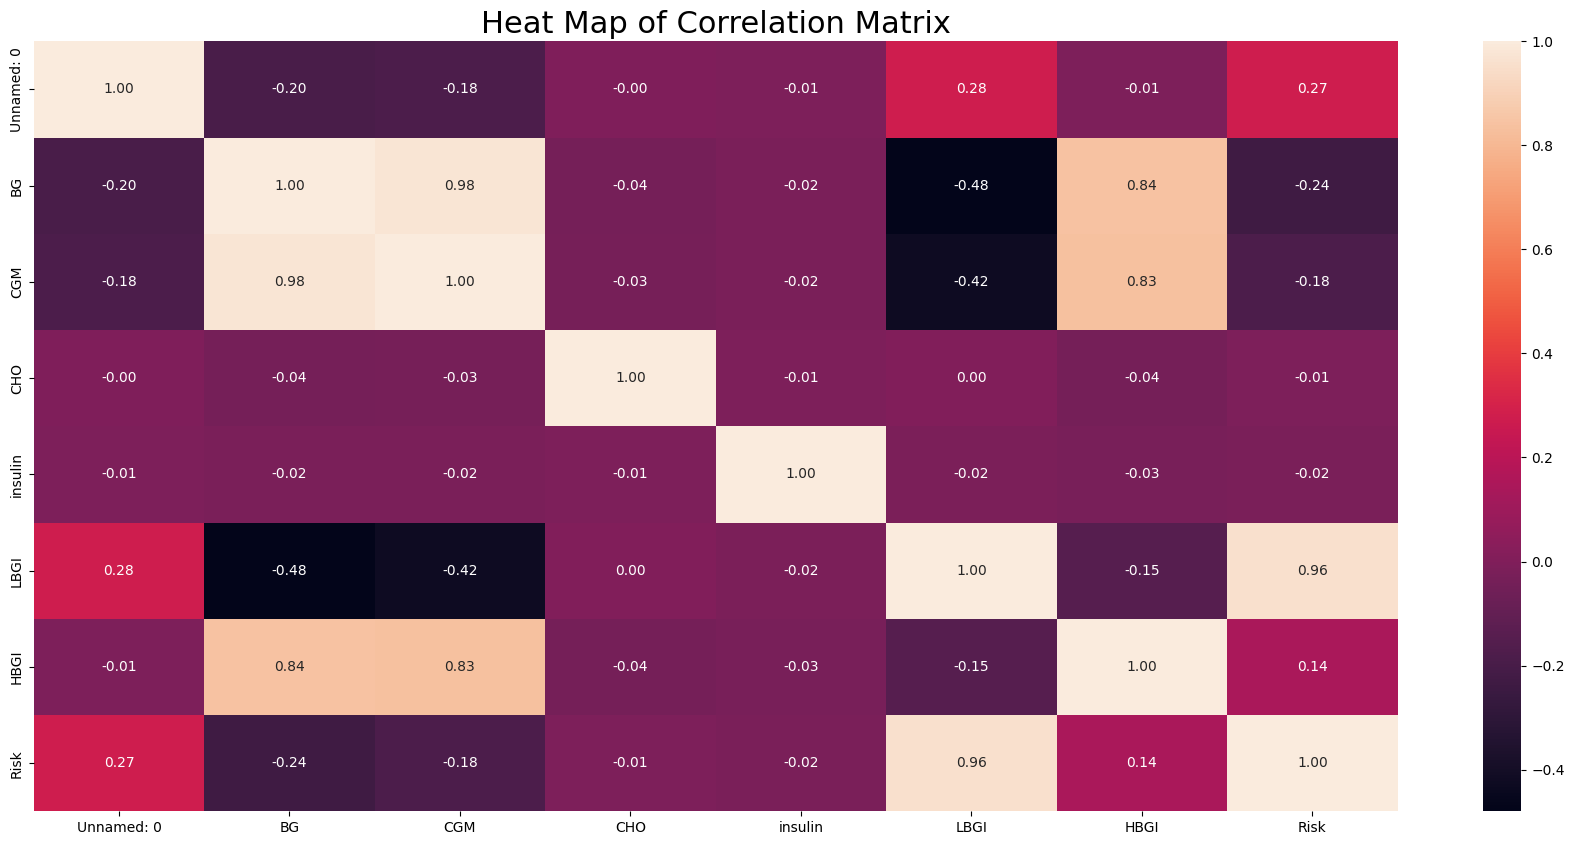

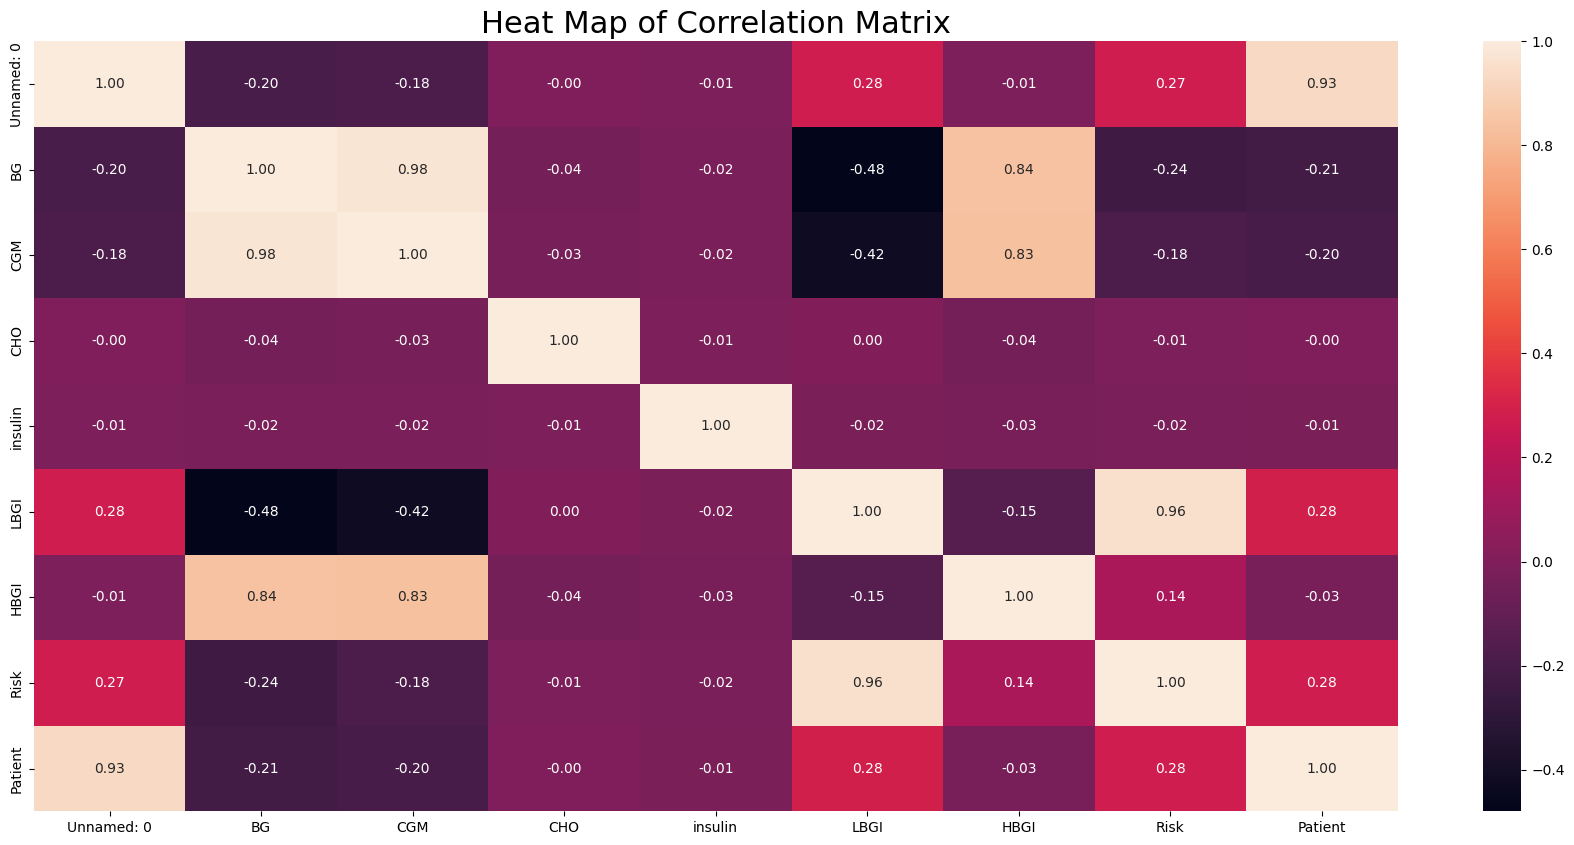

<Figure size 2200x1000 with 0 Axes>

In [23]:
corr_instance = CorrelationAnalysis(source, df1, file_name, problem_type, type_column, dependent_variable, corr_thres = 0.3)
df1 = corr_instance.get_data()
most_corr_df = corr_instance.get_most_corr_data()
print("most_corr_df: ", most_corr_df)
print("df1: ", df1)

In [26]:
date_index = 'Time'

In [27]:
tansformation_instance = DataTransformer(source, df, file_name, problem_type, type_column, dependent_variable, date_index)
transformed_df = tansformation_instance.get_transformed_data()
filled_scaler = tansformation_instance.get_filled_scaler()
numeric_columns_names = tansformation_instance.numeric_columns

                      Time          BG         CGM  CHO   insulin  LBGI  \
0      2023-10-25 06:00:00  126.013943  136.435033  0.0  0.013933   0.0   
1      2023-10-25 06:05:00  126.589661  137.121412  0.0  0.013933   0.0   
2      2023-10-25 06:10:00  127.155902  138.398018  0.0  0.013933   0.0   
3      2023-10-25 06:15:00  127.712577  140.060899  0.0  0.013933   0.0   
4      2023-10-25 06:20:00  128.259611  141.830932  0.0  0.013933   0.0   
...                    ...         ...         ...  ...       ...   ...   
31675  2023-10-30 05:35:00  117.122058  113.361990  0.0  0.006625   0.0   
31676  2023-10-30 05:40:00  117.562549  114.071279  0.0  0.006625   0.0   
31677  2023-10-30 05:45:00  117.994450  114.666332  0.0  0.006625   0.0   
31678  2023-10-30 05:50:00  118.417876  115.140354  0.0  0.006625   0.0   
31679  2023-10-30 05:55:00  118.832945  115.494597  0.0  0.006625   0.0   

           HBGI      Risk     Patient  
0      0.446600  0.446600  adolescent  
1      0.483302  0.

In [28]:
lstm_instance = LSTM(data=df, dependent_variable, test_size=0.3, lstm_units=50, epochs=5)
lstm_instance.prepare_data()
lstm_instance.scale_data()
lstm_instance.build_model()
lstm_instance.train_model()
lstm_instance.evaluate_model()

SyntaxError: positional argument follows keyword argument (897513608.py, line 1)

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM as LSTMLayer, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from datetime import datetime

class LSTMModel:
    def __init__(self, data, target_column, time_column, test_size=0.3, lstm_units=50, epochs=5):
        self.data = data
        self.target_column = target_column
        self.time_column = time_column
        self.test_size = test_size
        self.lstm_units = lstm_units
        self.epochs = epochs
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.scaler = MinMaxScaler()
        self.ohe = OneHotEncoder()
        
#     def prepare_data(self):
#         X = self.data.drop(columns=[self.target_column, self.time_column], axis=1)
#         y = self.data[self.target_column]
#         X_categorical = self.ohe.fit_transform(self.data[[self.target_column]]).toarray()
#         X = np.concatenate((X.values, X_categorical), axis=1)
#         self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.test_size, random_state=42, shuffle=False)
    
#     def scale_data(self):
#         print("Shapes before scaling:")
#         print(self.X_train.shape)
#         print(self.X_test.shape)
#         print("Number of categories:", len(self.ohe.categories_[0]))
#         X_categorical = self.ohe.transform(self.data[[self.target_column]]).toarray()
#         print("Shapes after one-hot encoding:")
#         print(X_categorical.shape)
#         self.X_train[:, :-X_categorical.shape[1]] = self.scaler.fit_transform(self.X_train[:, :-X_categorical.shape[1]])
#         self.X_test[:, :-X_categorical.shape[1]] = self.scaler.transform(self.X_test[:, :-X_categorical.shape[1]])


    def preprocess_data(self):
        
        df = self.data
        # Separate numerical and categorical columns
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

        
        # Scale numerical columns
        scaler = StandardScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

        # One-hot encode categorical columns
        df = pd.get_dummies(df, columns=categorical_cols)

        return df
    
    
    def split(self):
        X = self.data.drop(columns=[self.target_column], axis=1)
        y = self.data[self.target_column]
        X_categorical = self.ohe.fit_transform(self.data[[self.target_column]]).toarray()
        X = np.concatenate((X.values, X_categorical), axis=1)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.test_size, random_state=42, shuffle=False)
 

    def build_model(self):
        self.model = Sequential()
        self.model.add(LSTMLayer(units=self.lstm_units, input_shape=(self.X_train.shape[1], 1)))
        self.model.add(Dense(1, activation='relu'))  # Adjust the activation function as needed
        self.model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust the loss function as needed
    
    def train_model(self):
        self.model.fit(self.X_train, self.y_train, epochs=self.epochs, batch_size=32)
    
    def evaluate_model(self):
        loss = self.model.evaluate(self.X_test, self.y_test)
        print(f'Test Loss: {loss}')
    
    def predict(self, date):
        date_str = date.strftime('%Y-%m-%d %H:%M:%S')
        features = self.data.loc[self.data[self.time_column] == date_str].drop([self.target_column, self.time_column], axis=1).values
        features_categorical = self.ohe.transform(self.data[[self.target_column]]).toarray()
        features = np.concatenate((features, features_categorical), axis=1)
        scaled_features = self.scaler.transform(features)
        prediction = self.model.predict(scaled_features)
        return prediction

# Example usage:
# Assuming 'df' is your dataset DataFrame
df = pd.read_csv('Bussiness_facility/combined_data.csv')  # Load your dataset
lstm_instance = LSTMModel(data=df, target_column='insulin', time_column='Time', test_size=0.3, lstm_units=50, epochs=5)
preprocessed_data = lstm_instance.preprocess_data()
print("preprocessed_data: ", preprocessed_data)
print(lstm_instance.X_train)
print(lstm_instance.y_train)
# lstm_instance.scale_data()
print('After scaling')
print(lstm_instance.X_train)
print(lstm_instance.X_test)
lstm_instance.build_model()
lstm_instance.train_model()
lstm_instance.evaluate_model()

# Predict for a specific date
date_to_predict = datetime(2023, 10, 27, 6, 0, 0)  # Example date
prediction = lstm_instance.predict(date_to_predict)
print("Predicted value:", prediction)


preprocessed_data:         Unnamed: 0        BG       CGM       CHO   insulin      LBGI      HBGI  \
0       -1.731996  0.243943  0.380929 -0.100667 -0.097729 -0.347926 -0.349593   
1       -1.731887  0.254862  0.393971 -0.100667 -0.097729 -0.347926 -0.343200   
2       -1.731777  0.265601  0.418228 -0.100667 -0.097729 -0.347926 -0.336694   
3       -1.731668  0.276158  0.449826 -0.100667 -0.097729 -0.347926 -0.330092   
4       -1.731559  0.286533  0.483459 -0.100667 -0.097729 -0.347926 -0.323407   
...           ...       ...       ...       ...       ...       ...       ...   
31675    1.731559  0.075304 -0.057496 -0.100667 -0.146355 -0.347926 -0.417656   
31676    1.731668  0.083658 -0.044018 -0.100667 -0.146355 -0.347926 -0.415747   
31677    1.731777  0.091850 -0.032711 -0.100667 -0.146355 -0.347926 -0.413717   
31678    1.731887  0.099880 -0.023704 -0.100667 -0.146355 -0.347926 -0.411576   
31679    1.731996  0.107752 -0.016973 -0.100667 -0.146355 -0.347926 -0.409335   

       

AttributeError: 'NoneType' object has no attribute 'shape'

In [51]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# print(values)
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

[[2010 1 1 ... 1.79 0 0]
 [2010 1 1 ... 4.92 0 0]
 [2010 1 1 ... 6.71 0 0]
 ...
 [2014 12 31 ... 242.7 0 0]
 [2014 12 31 ... 246.72 0 0]
 [2014 12 31 ... 249.85 0 0]]


ValueError: could not convert string to float: 'NW'